In [1]:
!pip install numpy pandas matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("train.csv")

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [202]:
y = train_df['SalePrice']

In [204]:
X = train_df[['OverallQual', 'OverallCond', 'FullBath', 'KitchenAbvGr', 'GarageCars']]

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
model = LinearRegression()

In [210]:
model.fit(X_train, y_train)

LinearRegression()

In [212]:
y_pred = model.predict(X_test)

In [214]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 2376065542.589049
R^2 Score: 0.6902262722069543
Root Mean Squared Error: 48744.90273443008


In [183]:
coefficients = model.coef_
intercept = model.intercept_

In [185]:
coef_df_2 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

In [187]:
print(coef_df_2)

          Feature   Coefficient
0              Id     -2.206732
1      MSSubClass   -209.653617
2     LotFrontage    -60.965003
3         LotArea      0.422507
4     OverallQual  19559.892636
5     OverallCond   5077.568987
6       YearBuilt    285.141599
7    YearRemodAdd    125.360169
8      MasVnrArea     26.070187
9      BsmtFinSF1      4.742248
10     BsmtFinSF2      4.465101
11      BsmtUnfSF     -2.956677
12    TotalBsmtSF      6.250672
13       1stFlrSF     10.675457
14       2ndFlrSF     14.109111
15   LowQualFinSF      4.270040
16      GrLivArea     29.054608
17   BsmtFullBath  11712.182010
18   BsmtHalfBath   1149.084546
19       FullBath   5126.369920
20       HalfBath  -1889.642485
21   BedroomAbvGr  -9475.618083
22   KitchenAbvGr -21656.957616
23   TotRmsAbvGrd   4619.633553
24     Fireplaces   4811.880980
25    GarageYrBlt    -14.250616
26     GarageCars  18435.856643
27     GarageArea      5.496781
28     WoodDeckSF     19.995973
29    OpenPorchSF     -3.094351
30  Encl

In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
train4_df = pd.read_csv('train.csv')
y = train4_df['SalePrice']

In [238]:
X = train3_df[['OverallQual']]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
model = LinearRegression()

In [244]:
model.fit(X_train, y_train)

LinearRegression()

In [246]:
y_pred = model.predict(X_test)

In [248]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 2681026163.509092
R^2 Score: 0.6504677778896861
Root Mean Squared Error: 51778.626512385315


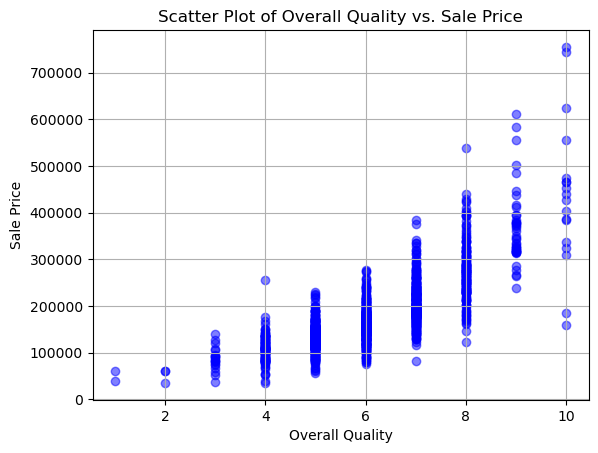

In [250]:
plt.scatter(train_df['OverallQual'], train_df['SalePrice'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()